In [2]:
import pandas as pd
data_frame = pd.read_csv('Fruit_360.csv')
frame = data_frame['name'].unique()
fsize = data_frame.groupby('name',sort=False).size()

In [3]:
data_frame.describe()

,red,green,blue
count,68430.000000,68430.000000,68430.000000
mean,128.672812,147.530359,174.409195
std,32.922878,36.826944,35.419838
min,59.682800,62.633200,71.061700
25%,101.609975,121.166175,153.726975
50%,127.331350,148.645100,175.787650
75%,151.768100,174.265350,199.934200
max,226.042500,238.038100,244.597000


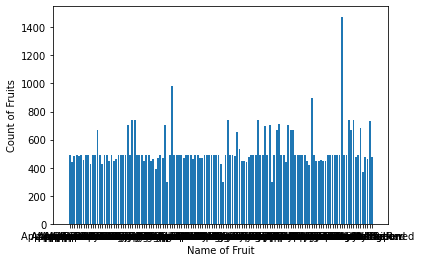

In [4]:
import matplotlib.pyplot as plt
plt.bar(frame,fsize)
plt.xlabel('Name of Fruit')
plt.ylabel('Count of Fruits')
plt.show()

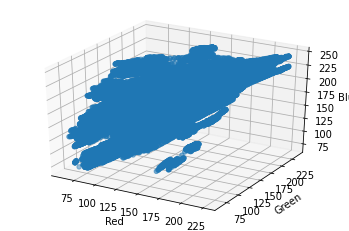

In [5]:
from mpl_toolkits.mplot3d import axes3d # Library
fig = plt.figure() # 
ax = fig.add_subplot(111,projection='3d') 
ax.scatter(data_frame['red'],data_frame['green'],data_frame['blue'])
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [6]:
data_frame.head(3)

,name,red,green,blue
0,Apple Braeburn,92.5305,108.0211,159.9495
1,Apple Braeburn,82.2292,86.2439,145.3926
2,Apple Braeburn,82.5229,86.4172,145.5333


In [7]:
x = data_frame.iloc[:,[1,2,3]].values
y = data_frame.iloc[:,0].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

train_test_split

print(x_train.shape)
print(x_test.shape)# 75:25 split

(51322, 3)
(17108, 3)


In [8]:
print(x)

[[ 92.5305 108.0211 159.9495]
 [ 82.2292  86.2439 145.3926]
 [ 82.5229  86.4172 145.5333]
 ...
 [139.26   157.2364 150.3045]
 [149.5571 166.9277 157.7758]
 [169.2454 183.5774 176.2998]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler # we normalize the data using this
s = MinMaxScaler()
x_train = s.fit_transform(x_train) 
x_test = s.transform(x_test) 

In [ ]:
x_train

array([[131.2586, 127.9845, 173.0862],
       [111.5475, 136.3894, 165.8891],
       [ 69.2794,  86.3541, 122.1106],
       ...,
       [184.2784, 196.3356, 210.1511],
       [113.2541, 122.5589, 148.0415],
       [134.5456, 158.5746, 153.517 ]])

In [ ]:
x_test

array([[ 83.073 ,  78.546 ,  77.1435],
       [ 94.7767, 110.5431, 171.4738],
       [ 89.9726, 153.2023, 222.962 ],
       ...,
       [184.461 , 175.2864, 181.3168],
       [108.5586, 150.9159, 158.3554],
       [187.0258, 209.3233, 221.4341]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array(['Grape Blue', 'Tomato 1', 'Tomato Yellow', ..., 'Dates',
       'Apple Red Yellow 2', 'Pepino'], dtype=object)

In [ ]:
y_test

array(['Grape Blue', 'Tomato 1', 'Tomato Yellow', ..., 'Dates',
       'Apple Red Yellow 2', 'Pepino'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)*100
confusion_matrix(y_pred,y_test)
model.score(x_test,y_test)*100

90.50736497545007

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

     Apple Braeburn       0.90      0.75      0.82       135
 Apple Crimson Snow       0.72      0.80      0.76       116
     Apple Golden 1       1.00      0.92      0.96       103
     Apple Golden 2       0.96      0.95      0.95       114
     Apple Golden 3       0.98      0.94      0.96       138
 Apple Granny Smith       0.99      0.95      0.97       120
    Apple Pink Lady       0.86      0.81      0.84       108
        Apple Red 1       0.87      0.92      0.89       109
        Apple Red 2       0.98      0.87      0.92       148
        Apple Red 3       0.91      0.81      0.86       107
Apple Red Delicious       0.93      0.85      0.88       131
 Apple Red Yellow 1       0.83      0.77      0.80       110
 Apple Red Yellow 2       0.85      0.94      0.89       155
            Apricot       0.97      0.92      0.94       147
            Avocado       0.96      0.83      0.89       113
       Avocado ripe    